<a href="https://colab.research.google.com/github/ajeet7iitm/MLT_OPPE/blob/main/Rigression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
rnd=np.random.default_rng(seed=101)


In [4]:
rnd


Generator(PCG64) at 0x7D2AC6B82F80

In [5]:
x_train=(np.arange(-2,2,0.01).reshape(1,-1))

In [6]:
x_train.shape

(1, 400)

In [7]:
y_train=(2*x_train**3+3*x_train**2+4+rnd.normal(0,1,x_train.shape[1]).reshape(1,-1)).T

In [8]:
y_train.shape

(400, 1)

In [9]:
y2=(2*x_train**3+3*x_train**2+4).reshape(1,-1).T

In [10]:
y2.shape

(400, 1)

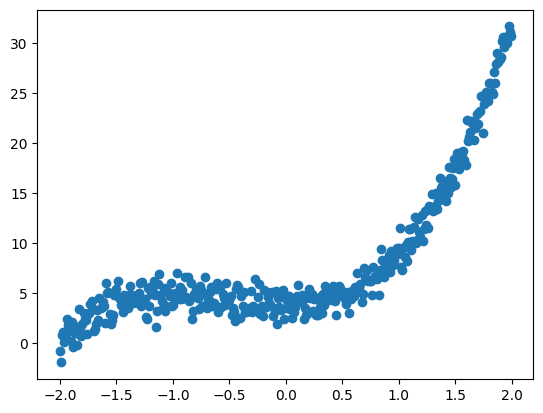

In [11]:
plt.scatter(x_train,y_train)

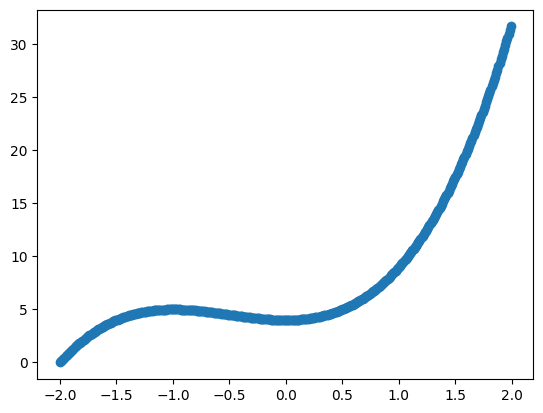

In [12]:
plt.scatter(x_train,y2)

In [13]:
rnd2=np.random.default_rng(seed=7)

In [14]:
x_test=np.arange(-2,2,0.02).reshape(1,-1)

In [15]:
y_test=(2*x_test**3+3*x_test**2+4+rnd2.normal(0,2,x_test.shape[1]).reshape(1,-1)).T

In [16]:
y_test

array([[ 2.46030671e-03],
       [ 8.33907075e-01],
       [-8.25477107e-02],
       [-1.09315168e+00],
       [-5.91757034e-03],
       [-8.71293110e-01],
       [ 1.43414321e+00],
       [ 4.18951849e+00],
       [ 7.13378963e-01],
       [ 6.39114200e-01],
       [ 3.03568410e+00],
       [ 2.93947002e+00],
       [ 2.60007650e+00],
       [ 6.85815911e-01],
       [ 2.63980036e+00],
       [ 4.23460639e+00],
       [ 2.95506905e-01],
       [ 2.20297648e+00],
       [-5.55533480e-01],
       [ 7.91068520e-01],
       [-1.95470076e-01],
       [ 3.13039374e+00],
       [ 1.17307504e+00],
       [ 4.35280072e+00],
       [ 4.22108617e+00],
       [ 3.62613811e+00],
       [-9.45903422e-01],
       [ 3.09314221e+00],
       [ 4.15183011e+00],
       [ 4.54924197e+00],
       [ 1.33172847e+00],
       [ 3.50154945e+00],
       [ 2.56084984e+00],
       [ 2.95691752e+00],
       [ 6.74906125e+00],
       [ 3.06093065e+00],
       [ 4.65585259e+00],
       [ 6.53082773e+00],
       [ 3.6

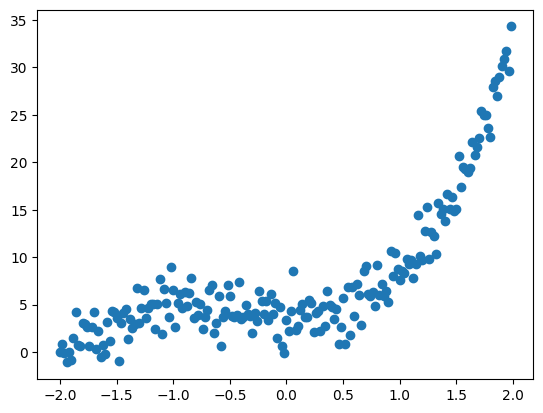

In [17]:
plt.scatter(x_test,y_test)

In [18]:
dummy=np.ones(x_train.shape[1])

In [19]:
dummy.shape

(400,)

In [20]:
x=np.row_stack((dummy,x_train))

In [21]:
x.shape

(2, 400)

In [22]:
x_t=np.row_stack((np.ones(x_test.shape[1]),x_test))

In [23]:
x_t.shape

(2, 200)

## Loss function

The total loss is the sum of square of errors between actual and predicted labels for each training point.  

The error for $i$-th training point is calculated as follows:
\begin{eqnarray}
e^{(i)} &=& (\mathrm{{actual\ label} - {predicted\ label}})^2 \\
        &=& \left ({y_{i}} -
        {h_{\mathbf{w}}(\mathbf{x}_{i})} \right)^2 \\
        &=& \left ({y_{i}} -
        {\mathbf{w}^T \mathbf{x}_{i}} \right)^2
\end{eqnarray}



The total loss $L(\mathbf{w})$ is sum of errors at each training point:
\begin{equation}
L(\mathbf{w}) = \sum_{i=1}^{n} e^{(i)}
\end{equation}

We divide this by $\frac{1}{2}$ for mathematical convenience in later use:


\begin{eqnarray}
  L(\mathbf{w}) &=& \frac{1}{2} \sum_{i=1}^{n} e^{(i)} \\ &=&  \frac{1}{2} \left({{\mathbf{X}^T \mathbf{w}}} - \mathbf{y} \right)^T \left({{\mathbf{X}^T \mathbf{w}}} - \mathbf{y} \right))
\end{eqnarray}

#### 1. Normal equation

Let's set $\dfrac{\partial L(\mathbf{w})}{\partial \mathbf{w}}$ to 0 and solve for $\mathbf{w}$:
\begin{eqnarray}
\frac{\partial L(\mathbf{w})}{\partial \mathbf{w}} &=& \mathbf{X} \mathbf{X}^T \mathbf{w} - \mathbf{X} \mathbf{y} = 0 \\
\mathbf{X}^T \mathbf{X} \mathbf{w} &=& \mathbf{X} \mathbf{y} \\
\mathbf{w} &=& \left( \mathbf{X} \mathbf{X}^T \right)^{-1} \mathbf{X} \mathbf{y}
\end{eqnarray}



In [24]:
def weights(x,y):
  return (np.linalg.pinv(x@x.T))@x@y

In [25]:
def predict(x,w):
  return (x.T)@w

In [26]:
#rmse
def rmseloss(y,yhat):
  return np.sqrt(np.mean((y-yhat)**2))

In [27]:
w=weights(x,y_train)

In [28]:
y_hat=predict(x,w)

In [29]:
rmseloss(y_train,y_hat)

4.477002001803876

In [30]:
y_test_hat=predict(x_t,w)

In [31]:
y_test.shape

(200, 1)

In [32]:
y_test_hat.shape

(200, 1)

In [33]:
rmseloss(y_test,y_test_hat)

4.7665163066422265

In [34]:
def gradient(x,w,y):
  return (x@x.T)@w-(x@y)

In [35]:
def grad_desc(x,y,eta,n_iter):
  w0=np.zeros(x.shape[0])
  for i in range(n_iter):
    w0=w0-eta*(gradient(x,w0,y))
  return w0

In [51]:
w_gd=grad_desc(x,y_train,0.000001,100000)

In [52]:
w_gd

array([[7.93982825, 7.93982825],
       [4.79910241, 4.79910241]])

In [53]:
w

array([[7.93982825],
       [4.79910241]])

In [54]:
y_gd_hat=predict(x,w_gd)

In [55]:
rmseloss(y_train,y_gd_hat)

4.477002001803876